In [38]:
import numpy as np
import matplotlib.pyplot as plt

**Excersie 6.1.**  What advantage does second-order information provide about convergence that first-order information lacks?

**Answer:**
Second-order information can garantee a local minimum, while first-order information can only garantee a stationary point.

**Excersie 6.2.**  When finding roots in one dimension, when would we use Newton’s method instead of the bisection method?

**Answer:**
When the function is convex or smooth and we have a good initial guess and can compute the hessian analytically.

**Excersie 6.3.**  Apply Newton’s method to the function $f(x) = x^2$ from a starting point of your choice. How many steps do we need to converge?

**Answer:**
Let's start from $x_0 = 2$. The gradient is $f'(x) = 2x$ and the hessian is $f''(x) = 2$. 
The update rule is 
$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)} = 2 - \frac{2\cdot2}{2} = 0
$$

We need only one step to converge (as expected for a quadratic function).

**Excersie 6.4.**  Apply Newton’s method to the function $f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^\top\mathbf{H} \mathbf{x}$ from $\mathbf{x}^{(1)} = [1, 1]^\top$. What have you observed? Use $\mathbf{H}$ as follows:

$$
\mathbf{H} = \begin{bmatrix} 1 & 0 \\ 0 & 1000 \end{bmatrix}
$$

Next, apply gradient descent to the same optimization problem stepping with unnormalized gradient. Do two steps of the algorithm. What have you observed? Finally, the conjugate gradient method. How many steps do you need to converge?

**Answer:**
Let's start with the gradient since all the methods are based on it. The gradient is 

$$
\nabla f(\mathbf{x}) = \mathbf{H} \mathbf{x} + \mathbf{H}^\top \mathbf{x} = \mathbf{H} \mathbf{x}
$$

For the Newton's method we need to compute the hessian, which is

$$
\nabla^2 f(\mathbf{x}) = \mathbf{H} + \mathbf{H}^\top = \mathbf{H}
$$

The update rule is

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \frac{\nabla f(\mathbf{x}_k)}{\nabla^2 f(\mathbf{x}_k)} = \mathbf{x}_k - \frac{\mathbf{H} \mathbf{x}_k}{\mathbf{H}} = \mathbf{x}_k - \mathbf{x}_k = \mathbf{0}
$$

The Newton's method converges in one step as expected for a quadratic function.

For the gradient descent we have the update rule

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \nabla f(\mathbf{x}_k) = \mathbf{x}_k -  \mathbf{H} \mathbf{x}_k
$$

The first step is

$$
\mathbf{x}_{1} = \mathbf{x}_0 -  \mathbf{H} \mathbf{x}_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1000 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -999 \end{bmatrix}
$$

The second step is

$$
\mathbf{x}_{2} = \mathbf{x}_1 -  \mathbf{H} \mathbf{x}_1 = \begin{bmatrix} 0 \\ -999 \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1000 \end{bmatrix} \begin{bmatrix} 0 \\ -999 \end{bmatrix} = \begin{bmatrix} 0 \\ 998001 \end{bmatrix}
$$

Even for a quadratic function the gradient descent does not converge when using unnormalized gradient. At just these two steps it even looks like it's diverging.

For the conjugate gradient method we know that it converges in $n$ steps for a quadratic function. So it will converge in two steps.


**Excersie 6.5.**  Compare Newton’s method and the secant method on $f(x) = x^2 + x^4$, with $x^{(1)} = -3$ and $x^{(0)} = -4$. Run each for 10 iterations. Make two plots:

1. Plot $f$ vs the iteration for each method
2. Plot $f'$ vs. x. Overlay the progression of each method, drawing lines from $(x^{(i)}, f'(x^{(i)}))$ to $(x^{(i+1)}, 0)$ to  $(x^{(i+1)}, f'(x^{(i+1)}))$ for each transition.

What can we conclude about this comparison?

In [39]:
def f(x):
    return x**2 + x**4

def df(x):
    return 2*x + 4*x**3

def ddf(x):
    return 2 + 12*x**2

# Newton's method
def newton_method(x0, max_iter):
    x_values = [x0]
    f_values = [f(x0)]

    for i in range(max_iter):
        x = x_values[-1]
        x -= df(x) / ddf(x)
        x_values.append(x)
        f_values.append(f(x))

    return x_values, f_values

# Secant method
def secant_method(x0, x1, max_iter):
    x_values = [x0, x1]
    f_values = [f(x0), f(x1)]

    for i in range(2, max_iter):
        x = x_values[-1] - (x_values[-1]- x_values[-2]) / (df(x_values[-1]) - df(x_values[-2])) * df(x_values[-1])
        x_values.append(x)
        f_values.append(f(x))

    return x_values, f_values

In [40]:
max_iter = 10
x_0 = -4
x_1 = -3

# Run the methods
x0_newton, f_newton = newton_method(x_0, max_iter)
x0_secant, f_secant = secant_method(x_0, x_1, max_iter)

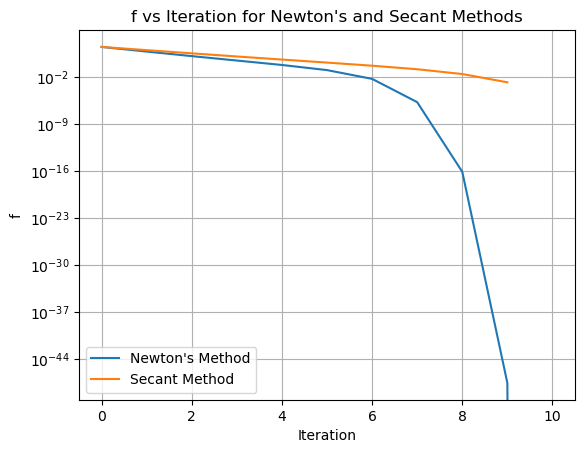

In [41]:
# Plot f vs the iteration for each method
plt.plot(range(len(f_newton)), f_newton, label='Newton\'s Method')
plt.plot(range(len(f_secant)), f_secant, label='Secant Method')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f')
plt.title('f vs Iteration for Newton\'s and Secant Methods')
plt.legend()
plt.grid()
plt.show()

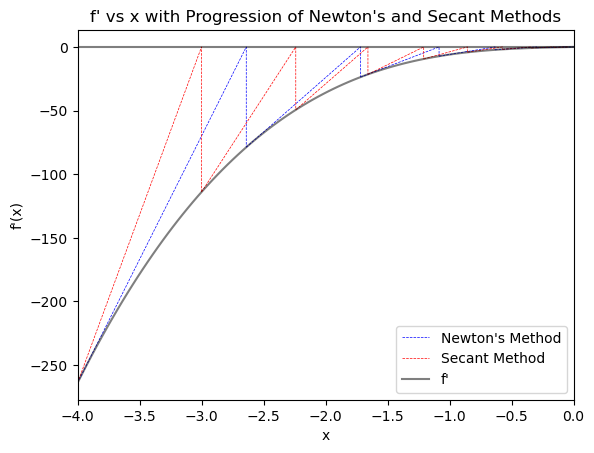

In [42]:
# Plot f' vs x with lines showing progression of each method

for i in range(len(x0_newton)-1):
    plt.plot([x0_newton[i], x0_newton[i+1], x0_newton[i+1]], [df(x0_newton[i]), 0, df(x0_newton[i+1])], color = 'b', linestyle = 'dashed', linewidth = 0.5, label='Newton\'s Method' if i == 0 else '')

for i in range(len(x0_secant)-1):
    plt.plot([x0_secant[i], x0_secant[i+1], x0_secant[i+1]], [df(x0_secant[i]), 0, df(x0_secant[i+1])], color = 'r', linestyle = 'dashed', linewidth = 0.5, label='Secant Method' if i == 0 else '')

plt.plot(np.linspace(-4, 0, 100), df(np.linspace(-4, 0, 100)), color = 'k', label='f\'', alpha = 0.5)
plt.hlines(0, -4, 0, color = 'k', alpha = 0.5)
plt.xlim(-4, 0)
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.title('f\' vs x with Progression of Newton\'s and Secant Methods')
plt.show()

We can conclude that the secant method is slower to converge than Newton's method. The tagent approximation is not as good as the hessian.

**Excersie 6.6.**  Give an example of a sequence of points $\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots$ and a function $f$ such that $f(\mathbf{x}^{(1)})>f(\mathbf{x}^{(2)})>\ldots$  and yet the sequence does not converge to a local minimum. Assume $f$ is bounded from below.

**Answer:**
Let's consider the function $f(x) = e^{-x}$. The function is bounded from below by 0 an the sequence does not converge to a local minimum yet it's monotonically decreasing for all $x$ along postive real axis.

**Excersie 6.7.**  What is the advantage of a Quasi-Newton method over Newton’s method?

**Answer:**
The advantage of Quasi-Newton method is that it does not require the computation of the hessian.

**Excersie 6.8.**  Give an example where the BFGS update does not exist. What would you do to in this case?

**Answer:** The update is undefined when the denominator is zero. This happens when $\delta \perp \gamma$ (or sufficiently close numerically wise). In this case we can set $\mathbf{Q} = \mathbf{I}$.

Excersie 6.9.  Suppose we have a function $f(\mathbf{x}) = (x_1 + 1)^2 + (x_2 + 3)^2+4$. If we start at the origin, what is the resulting point after one step of Newton’s method?

**Answer:** The gradient is $\nabla f(\mathbf{x}) = \begin{bmatrix} 2(x_1 + 1) \\ 2(x_2 + 3) \end{bmatrix}$ and the hessian is $\nabla^2 f(\mathbf{x}) = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$. The update rule is

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \frac{\nabla f(\mathbf{x}_k)}{\nabla^2 f(\mathbf{x}_k)} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} - \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}^{-1}\begin{bmatrix} 2(0 + 1) \\ 2(0 + 3) \end{bmatrix} = \begin{bmatrix} -1 \\ -3 \end{bmatrix}
$$

This is the minimum and we got there in one step as expected for a quadratic function.

**Exercise 6.10.**  In this problem we will derive the optimization problem from which the Davidon-Fletcher-Powell update is obtained. Start with a quadratic approximation at $\mathbf{x}^{(k)}$:

$$
f^{(k)}(\mathbf{x}) = y^{(k)} + \left(\mathbf{g^{(k)}}\right)^\top (\mathbf{x} - \mathbf{x}^{(k)}) + \frac{1}{2}(\mathbf{x} - \mathbf{x}^{(k)})^\top \mathbf{H}^{(k)} (\mathbf{x} - \mathbf{x}^{(k)})
$$

where $y^{(k)}, \mathbf{g}^{(k)}, \mathbf{H}^{(k)}$ are the objective function, the true gradient, and a positive definite Hessian approximation at $\mathbf{x}^{(k)}$.
The next iteration is chosen using line search to obtain:

$$
\mathbf{x}^{(k+1)} \leftarrow \mathbf{x}^{(k)} - \alpha^{(k)}\left(\mathbf{H}^{(k)}\right)^{-1}\mathbf{g}^{(k)}
$$

We can construct a new quadratic approximation at $f^{(k+1)}$ at $\mathbf{x}^{(k+1)}$. The approximation should enforce that the local function evaluation is correct:

$$
f^{(k+1)}(\mathbf{x}^{(k+1)}) = y^{(k+1)}
$$

and that the local gradient is correct:

$$
\nabla f^{(k+1)}(\mathbf{x}^{(k+1)}) = \mathbf{g}^{(k+1)}
$$

and the previous gradient is correct:

$$
\nabla f^{(k+1)}(\mathbf{x}^{(k)}) = \mathbf{g}^{(k)}
$$

Show that updating the Hessian approximation to obtain $\mathbf{H}^{(k+1)}$ requires:

$$
\mathbf{H}^{(k+1)}\mathbf{\delta}^{(k+1)} = \mathbf{y}^{(k+1)}
$$

Then, show that in order for $\mathbf{H}^{(k+1)}$ to be positive definite, we require:

$$
\mathbf{\delta}^{(k+1)\top}\mathbf{\gamma}^{(k+1)} > 0
$$

Finally, assuming that the curvature condition is enforced, explain why one then solves the following optimization problem to obtain $\mathbf{H}^{(k+1)}$:

$$
\begin{align}
\min_{\mathbf{H}} \|\mathbf{H} - \mathbf{H}^{(k)}\|& \\
\text{subject to } \mathbf{H}= \mathbf{H}^\top& \\
\mathbf{H}\mathbf{\delta}^{(k+1)} = \mathbf{y}^{(k+1)}&
\end{align}
$$

**Answer:**
The new quadratic approximation is:

$$
f^{(k+1)}(\mathbf{x}) = y^{(k+1)} + \left(\mathbf{g^{(k+1)}}\right)^\top (\mathbf{x} - \mathbf{x}^{(k+1)}) + \frac{1}{2}(\mathbf{x} - \mathbf{x}^{(k+1)})^\top \mathbf{H}^{(k+1)} (\mathbf{x} - \mathbf{x}^{(k+1)})
$$

Plugging in $\mathbf{x}^{(k+1)}$ all terms except $y^{(k+1)}$ cancel out. So we have:

$$
f^{(k+1)}(\mathbf{x}^{(k+1)}) = y^{(k+1)}
$$

The local gradient is

$$
\nabla f^{(k+1)}(\mathbf{x}^{(k+1)}) = \mathbf{g}^{(k+1)} + \mathbf{H}^{(k+1)}(\mathbf{x}^{(k+1)} - \mathbf{x}^{(k+1)}) = \mathbf{g}^{(k+1)}
$$

The previous gradient is:

$$
\nabla f^{(k+1)}(\mathbf{x}^{(k)}) = \mathbf{g}^{(k+1)} + \mathbf{H}^{(k+1)}(\mathbf{x}^{(k)} - \mathbf{x}^{(k+1)}) = \mathbf{g}^{(k)}
$$

This means that we must have

$$
\mathbf{g}^{(k+1)} - \mathbf{g}^{(k)} = \mathbf{H}^{(k+1)}(\mathbf{x}^{(k+1)} - \mathbf{x}^{(k)})
$$

We can rewrite this as

$$
\gamma^{(k+1)} = \mathbf{H}^{(k+1)}\delta^{(k+1)}
$$

where $\gamma^{(k+1)} = \mathbf{g}^{(k+1)} - \mathbf{g}^{(k)}$ and $\delta^{(k+1)} = \mathbf{x}^{(k+1)} - \mathbf{x}^{(k)}$.

The diffinition of a positive definite matrix is that $\mathbf{x}^\top \mathbf{H} \mathbf{x} > 0$ for all $\mathbf{x} \neq \mathbf{0}$. This means that:

$$
\delta^{(k+1)\top}\gamma^{(k+1)} = \delta^{(k+1)\top}\mathbf{H}^{(k+1)}\delta^{(k+1)} > 0
$$

Since we our final goal is to find $\mathbf{H}^{(k+1)}$ we can think about how far we come thus far. We know that we are looking for a $n \times n$ matrix, meaning we are looking for $n^2$ parameters. We have $n$ constraints from the symmetry of the matrix (since it must be positive definite) and $n$ constraints from the curvature condition. This means that we have $n^2 - 2n$ degrees of freedom (not enough to determine the matrix). To find the last parameters we choose the matrix that is closest to the previous matrix.